In [24]:
"""
Noise Free  case:
Noisy case with known noise-level per datapoint (how)
"""

'\nNoise Free  case:\nNoisy case with known noise-level per datapoint (how)\n'

In [32]:
# Data set generation
import numpy as np 

X = np.linspace(start=0, stop = 10, num= 1_000).reshape(-1,1)
y = np.squeeze(X*np.sin(X))

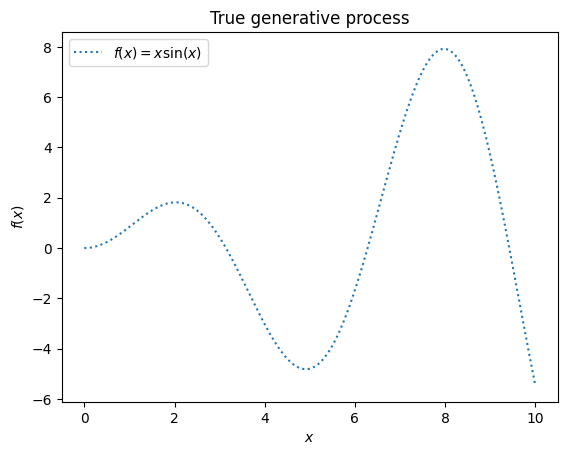

In [33]:
#Plot part - copied
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")


In [34]:
# Noise Free case 
# we will only select few samples
rng = np.random.RandomState(3)
training_indices = rng.choice(np.arange(y.size), size = 8, replace = False)
X_train, y_train = X[training_indices], y[training_indices]

In [35]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


# fit a GP on these few training data samples.
# will be using Radial Basis Function kernel and a constant
#parameter to fit the amplitude
# KERNEL WILL BE CHANGED
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e4))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

C:\Users\Özgür Nazlı\AppData\Roaming\Python\Python312\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


10.7**2 * RBF(length_scale=2.31)

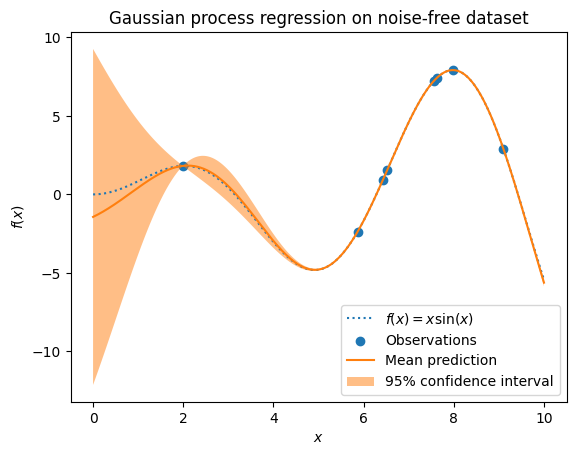

In [37]:
# after fitting our model, we see that the hyperparameters of the 
# kernel have been optimized.
# Now we will use our kernel to compute the mean prediction of the
# full dataset and plot the %95 confidence interval

mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

# PLOT - COPIED

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

# NUMBER OF DATA IS VERY EFFECTİVE ON THE RESULT